In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.16.2


In [2]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, size=(observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_Introduction', inputs=generated_inputs, targets=generated_targets)

training_data = np.load('TF_Introduction.npz')

input_size = 2
output_size = 1

# seq func specifies how the model will be laid down (stack layers)
# linear combination + output -> layer
model = tf.keras.Sequential([
    # calculates dot product of inputs and weights and adds bias
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                         )
])

# configs model for training
# sgd -> stochastic gradient descent (optimizer)
# l2 norm loss - scaled by num of observations
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# epoch = iteration over full dataset
# verbose 0 silent, verbose 1 progress bar
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)


Epoch 1/100


2025-09-15 21:20:28.602972: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-15 21:20:28.602992: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-15 21:20:28.602999: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-15 21:20:28.603022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-15 21:20:28.603031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-15 21:20:28.829283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 - 0s - 10ms/step - loss: 22.7439
Epoch 2/100
32/32 - 0s - 3ms/step - loss: 1.2274
Epoch 3/100
32/32 - 0s - 3ms/step - loss: 0.4323
Epoch 4/100
32/32 - 0s - 3ms/step - loss: 0.4007
Epoch 5/100
32/32 - 0s - 3ms/step - loss: 0.4215
Epoch 6/100
32/32 - 0s - 3ms/step - loss: 0.3819
Epoch 7/100
32/32 - 0s - 3ms/step - loss: 0.3681
Epoch 8/100
32/32 - 0s - 3ms/step - loss: 0.3662
Epoch 9/100
32/32 - 0s - 3ms/step - loss: 0.3849
Epoch 10/100
32/32 - 0s - 3ms/step - loss: 0.3838
Epoch 11/100
32/32 - 0s - 3ms/step - loss: 0.4328
Epoch 12/100
32/32 - 0s - 3ms/step - loss: 0.4069
Epoch 13/100
32/32 - 0s - 3ms/step - loss: 0.3754
Epoch 14/100
32/32 - 0s - 3ms/step - loss: 0.3889
Epoch 15/100
32/32 - 0s - 3ms/step - loss: 0.3706
Epoch 16/100
32/32 - 0s - 3ms/step - loss: 0.3846
Epoch 17/100
32/32 - 0s - 3ms/step - loss: 0.3566
Epoch 18/100
32/32 - 0s - 3ms/step - loss: 0.3642
Epoch 19/100
32/32 - 0s - 3ms/step - loss: 0.4058
Epoch 20/100
32/32 - 0s - 3ms/step - loss: 0.3911
Epoch 21/100
32/32 

In [3]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
weights, bias

(array([[ 2.0164065],
        [-2.899657 ]], dtype=float32),
 array([5.0448356], dtype=float32))

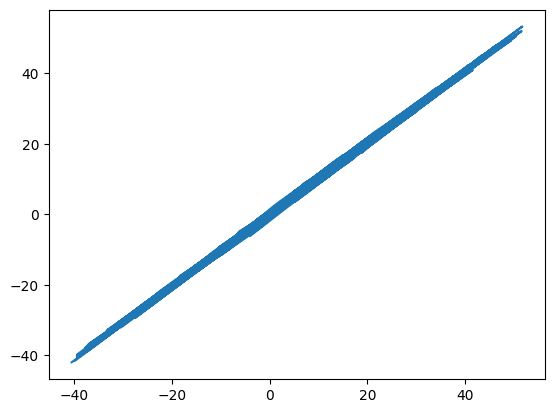

In [4]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))